# Assignment 4: Benchmarking Fashion-MNIST with ANN

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
"The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others." - **Zalando Research, Github Repo.**"

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![Here's an example how the data looks (each class takes three-rows):](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In this assignment, you will attempt to benchmarking the Fashion-MNIST using ANNs. You must use it to train some neural networks on TensorFlow and predict the final output of 10 classes. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (20 pts)

You can load the Fashion MNIST directly from Tensorflow using the folliwng code:
    tf.keras.datasets.fashion_mnist.load_data();

Write some code to load the data file and take a quick look at the dataset, and output the following:
- How big is your dataset? (regarding MB) - 147 MB
- How many entries does it have? - 70000 entries
- How many features does it have? - 784 features (pixel-28*28)
- What are some basic statistics you can learn right away about this dataset? - its a very large dataset. If we attempt to use traditional ML techniques, it will run very slow given the high dimensionality of the data.

**Large-scale Visualization:** Demonstrate that this dataset is indeed a complex and high dimensional worthy of an attempt on TensorFlow. Again, is there any non-linearly separation among the classes? Discover and plot out all features among the features.

In [1]:
# You might want to use the following package
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# Your code goes here for this section.
fashion_mnist_data=tf.keras.datasets.fashion_mnist;

C:\Users\Oindrila\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_data=pd.read_csv('fashion-mnist_train.csv')
test_data=pd.read_csv('fashion-mnist_test.csv')

In [3]:
print('How big is your dataset? (in terms of MB)')
print ((os.path.getsize("fashion-mnist_train.csv") >> 20) + (os.path.getsize("fashion-mnist_test.csv") >> 20),'MB')

How big is your dataset? (in terms of MB)
147 MB


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [6]:
X = np.array(train_data.iloc[:, 1:])
y = tf.keras.utils.to_categorical(np.array(train_data.iloc[:, 0]))

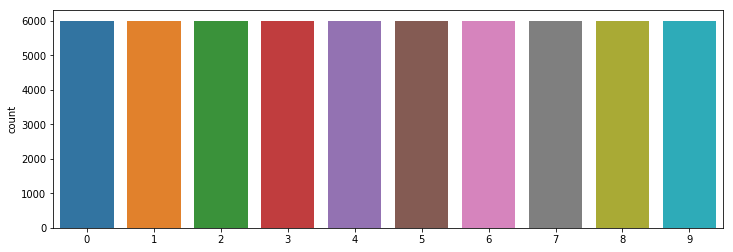

In [7]:
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize = (12, 4))
sns.countplot(y.argmax(1))

In [8]:
label_classes = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

In [9]:
fashion_mnist_data=tf.keras.datasets.fashion_mnist;
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist_data.load_data()


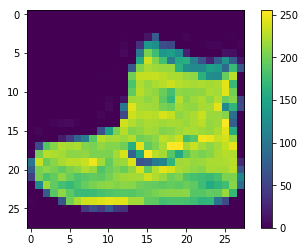

In [11]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

In [12]:
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

Given all the features and classes, we can see that classes like sneakers and ankle boots are not linearly separable. Similarly few other classes too are not linearly separable. Also with (28 * 28) pixel we can surely say that the dataset is complex and is high dimensional and hence worthy of using Tensorflow.

- - -
## 2. CONSTRUCTION PHASE (25 pts)

Define at least three networks with different structures: Ensure the input layer has the right number of inputs. The best structure often is found through a process of trial and error experimentation:
- You may start with a fully connected network structure with two hidden layers.
- You may try a few activation functions to see if they affect the performance.
- You may use various optimizers to tweak the model parameters to minimize the cost function.

In [13]:
# Your code goes here
n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
reset_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")


In [14]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [15]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [16]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [17]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [18]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

- - -
## 3. EXECUTION PHASE (30 pts)

For each of the three models of your neural networks, open a TensorFlow session, define the number of epochs and size of the training batch (20 pts): For each model, you must compute the performance measures: Confusion Matrix and Class Accuracy.
- Which one yields the best performance measure for your dataset?
- You must be able to save the trained model and load it from disk to evaluate a test set


In [19]:
# Your code goes here
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [20]:
n_epochs = 40
batch_size = 50

In [21]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [22]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.8 Val accuracy: 0.8392
1 Batch accuracy: 0.8 Val accuracy: 0.8492
2 Batch accuracy: 0.86 Val accuracy: 0.8592
3 Batch accuracy: 0.96 Val accuracy: 0.852
4 Batch accuracy: 0.9 Val accuracy: 0.86
5 Batch accuracy: 0.9 Val accuracy: 0.8646
6 Batch accuracy: 0.92 Val accuracy: 0.8718
7 Batch accuracy: 0.9 Val accuracy: 0.8708
8 Batch accuracy: 0.9 Val accuracy: 0.865
9 Batch accuracy: 0.86 Val accuracy: 0.8742
10 Batch accuracy: 0.86 Val accuracy: 0.8756
11 Batch accuracy: 0.92 Val accuracy: 0.8788
12 Batch accuracy: 0.88 Val accuracy: 0.8724
13 Batch accuracy: 0.92 Val accuracy: 0.8788
14 Batch accuracy: 0.86 Val accuracy: 0.8796
15 Batch accuracy: 0.84 Val accuracy: 0.881
16 Batch accuracy: 0.9 Val accuracy: 0.8802
17 Batch accuracy: 0.94 Val accuracy: 0.8796
18 Batch accuracy: 0.88 Val accuracy: 0.8856
19 Batch accuracy: 1.0 Val accuracy: 0.8814
20 Batch accuracy: 0.94 Val accuracy: 0.889
21 Batch accuracy: 0.94 Val accuracy: 0.8874
22 Batch accuracy: 0.96 Val accura

In [24]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8868

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[861,   0,  23,  19,   6,   1,  83,   0,   7,   0],
       [  3, 971,   3,  17,   2,   0,   4,   0,   0,   0],
       [ 17,   0, 856,   7,  74,   1,  44,   0,   1,   0],
       [ 31,  10,  17, 880,  36,   0,  22,   0,   4,   0],
       [  0,   1, 107,  29, 813,   0,  47,   0,   3,   0],
       [  0,   0,   0,   1,   0, 969,   0,  19,   2,   9],
       [143,   1, 108,  17,  66,   0, 652,   0,  13,   0],
       [  0,   0,   0,   0,   0,  29,   0, 947,   0,  24],
       [  4,   0,   9,   2,   5,   2,  10,   4, 964,   0],
       [  0,   0,   0,   0,   0,  11,   1,  33,   0, 955]], dtype=int64)

# 2nd Model- Construction Phase

In [27]:
n_inputs = 28*28
n_hidden1 = 400
n_hidden2 = 200
n_outputs = 10

In [28]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [29]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [30]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [31]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [32]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# 2nd Model- Execution Phase

In [33]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [34]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./model2.ckpt")

0 Batch accuracy: 0.86 Val accuracy: 0.8426
1 Batch accuracy: 0.74 Val accuracy: 0.853
2 Batch accuracy: 0.86 Val accuracy: 0.8594
3 Batch accuracy: 0.9 Val accuracy: 0.8594
4 Batch accuracy: 0.86 Val accuracy: 0.863
5 Batch accuracy: 0.92 Val accuracy: 0.867
6 Batch accuracy: 0.92 Val accuracy: 0.877
7 Batch accuracy: 0.88 Val accuracy: 0.8754
8 Batch accuracy: 0.88 Val accuracy: 0.8716
9 Batch accuracy: 0.84 Val accuracy: 0.8784
10 Batch accuracy: 0.86 Val accuracy: 0.8794
11 Batch accuracy: 0.92 Val accuracy: 0.8834
12 Batch accuracy: 0.84 Val accuracy: 0.8792
13 Batch accuracy: 0.94 Val accuracy: 0.8778
14 Batch accuracy: 0.86 Val accuracy: 0.886
15 Batch accuracy: 0.86 Val accuracy: 0.881
16 Batch accuracy: 0.88 Val accuracy: 0.8854
17 Batch accuracy: 0.92 Val accuracy: 0.8876
18 Batch accuracy: 0.88 Val accuracy: 0.8864
19 Batch accuracy: 0.96 Val accuracy: 0.8878
20 Batch accuracy: 0.96 Val accuracy: 0.89
21 Batch accuracy: 0.92 Val accuracy: 0.8914
22 Batch accuracy: 0.96 Val a

In [35]:
with tf.Session() as sess:
    saver.restore(sess, "./model2.ckpt") # or better, use save_path
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./model2.ckpt


In [36]:
accuracy_score(y_test, y_pred)

0.8877

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[864,   2,  23,  18,   4,   2,  77,   0,  10,   0],
       [  5, 970,   0,  20,   3,   0,   2,   0,   0,   0],
       [ 17,   0, 873,  12,  63,   0,  34,   0,   1,   0],
       [ 23,   8,  24, 886,  37,   0,  16,   0,   6,   0],
       [  1,   1, 121,  24, 812,   0,  39,   0,   2,   0],
       [  0,   0,   0,   0,   0, 965,   0,  19,   2,  14],
       [133,   1, 117,  24,  75,   0, 639,   0,  11,   0],
       [  0,   0,   0,   0,   0,  21,   0, 958,   0,  21],
       [  5,   0,  11,   7,   3,   4,   7,   3, 960,   0],
       [  1,   0,   0,   0,   0,  13,   0,  36,   0, 950]], dtype=int64)

# 3rd Model - Construction Phase

In [38]:
n_inputs = 28*28
n_hidden1 = 350
n_hidden2 = 100
n_outputs = 10

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [39]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.elu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.elu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [40]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [41]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [42]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# 3rd Model - Execution Phase

In [43]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [44]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./model3.ckpt")

0 Batch accuracy: 0.72 Val accuracy: 0.8444
1 Batch accuracy: 0.74 Val accuracy: 0.8528
2 Batch accuracy: 0.86 Val accuracy: 0.8566
3 Batch accuracy: 0.9 Val accuracy: 0.855
4 Batch accuracy: 0.9 Val accuracy: 0.859
5 Batch accuracy: 0.92 Val accuracy: 0.862
6 Batch accuracy: 0.94 Val accuracy: 0.8686
7 Batch accuracy: 0.88 Val accuracy: 0.8684
8 Batch accuracy: 0.9 Val accuracy: 0.8656
9 Batch accuracy: 0.9 Val accuracy: 0.8706
10 Batch accuracy: 0.86 Val accuracy: 0.875
11 Batch accuracy: 0.92 Val accuracy: 0.8736
12 Batch accuracy: 0.86 Val accuracy: 0.8692
13 Batch accuracy: 0.9 Val accuracy: 0.8668
14 Batch accuracy: 0.84 Val accuracy: 0.8762
15 Batch accuracy: 0.84 Val accuracy: 0.874
16 Batch accuracy: 0.88 Val accuracy: 0.8776
17 Batch accuracy: 0.94 Val accuracy: 0.8796
18 Batch accuracy: 0.84 Val accuracy: 0.8802
19 Batch accuracy: 0.94 Val accuracy: 0.88
20 Batch accuracy: 0.94 Val accuracy: 0.8832
21 Batch accuracy: 0.92 Val accuracy: 0.882
22 Batch accuracy: 0.92 Val accur

In [45]:
with tf.Session() as sess:
    saver.restore(sess, "./model3.ckpt") # or better, use save_path
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./model3.ckpt


In [46]:
accuracy_score(y_test, y_pred)

0.8815

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[861,   0,  27,  21,   4,   1,  77,   0,   9,   0],
       [  3, 968,   0,  23,   2,   0,   3,   0,   1,   0],
       [ 16,   1, 867,  10,  49,   1,  54,   0,   2,   0],
       [ 28,   9,  15, 886,  35,   1,  24,   0,   2,   0],
       [  1,   1, 149,  27, 764,   0,  55,   0,   3,   0],
       [  0,   0,   0,   1,   0, 951,   0,  30,   2,  16],
       [139,   2, 110,  27,  58,   0, 653,   0,  11,   0],
       [  0,   0,   0,   0,   0,  24,   0, 945,   0,  31],
       [  6,   2,   8,   7,   2,   3,   6,   4, 962,   0],
       [  0,   0,   0,   0,   0,   8,   1,  33,   0, 958]], dtype=int64)

- - -
## 4. FINETUNING THE NETWORK (20 pts)

You may be able to compare the performance of your method agaist other ML methods below:
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com

To improve the performance of your ANN, you can use grid search with cross-validation to find the right set of hyperparameters, but that would take a lot of times (days, sometimes weeks). Therefore, you must make some decision of which reasonable values for each hyperparameter, so that you can restrict the search space. Here's a few decision about the network you have to made and justify:

- The number of hidden layers. Why did you pick this many?
- The number of neurons per hidden layers. Provide some justifiable reasons
- Which activation functions need to be used? Why?



In [48]:
n_inputs = 28*28
n_hidden1 = 400
n_hidden2 = 200
n_outputs = 10

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [49]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [50]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [57]:
learning_rate = 0.001
momentum = 0.5
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [58]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [59]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [60]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.8 Val accuracy: 0.8608
1 Batch accuracy: 0.92 Val accuracy: 0.8744
2 Batch accuracy: 0.86 Val accuracy: 0.8852
3 Batch accuracy: 0.84 Val accuracy: 0.8858
4 Batch accuracy: 0.94 Val accuracy: 0.8896
5 Batch accuracy: 0.92 Val accuracy: 0.8876
6 Batch accuracy: 0.86 Val accuracy: 0.8918
7 Batch accuracy: 0.96 Val accuracy: 0.8826
8 Batch accuracy: 0.94 Val accuracy: 0.8922
9 Batch accuracy: 0.88 Val accuracy: 0.8934
10 Batch accuracy: 0.92 Val accuracy: 0.8948
11 Batch accuracy: 0.92 Val accuracy: 0.8968
12 Batch accuracy: 0.88 Val accuracy: 0.8968
13 Batch accuracy: 0.9 Val accuracy: 0.8966
14 Batch accuracy: 0.96 Val accuracy: 0.8998
15 Batch accuracy: 0.94 Val accuracy: 0.8962
16 Batch accuracy: 1.0 Val accuracy: 0.8988
17 Batch accuracy: 0.94 Val accuracy: 0.9014
18 Batch accuracy: 0.94 Val accuracy: 0.8932
19 Batch accuracy: 0.94 Val accuracy: 0.9
20 Batch accuracy: 0.96 Val accuracy: 0.9
21 Batch accuracy: 0.94 Val accuracy: 0.8994
22 Batch accuracy: 1.0 Val ac

In [61]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [62]:
accuracy_score(y_test, y_pred)

0.8951

- - -
## 5. OUTLOOK (5 pts)

Plan for the outlook of your system: This will lead to the direction of your future project:
- Did your neural network outperform other "traditional ML technique? Why/why not?
- Does your model work well for the future? If not, which model should be further investigated?
- Do you satisfy with your system? What do you think needed to improve?



#Answers
- Did your neural network outperform other: My neural network performed better than 90% of the traditional ML techniques. The reason might be the different parameters, the large size of the data, better scaling hence better for image classification, better with large number of features and also faster.
- Does your model work well for the future? If not, which model should be further investigated? - It may not work well for future. CNN and RNN may outperform and have an incredible accuracy
- Are you satisfy with your system? What do you think needed to improve? - I'm moderately satisfied with this model. However it could be improved by using other type of Optimizers and activation functions as there are many.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 3:...".
 * More on the Fashion-MNIST to be found here: https://hanxiao.github.io/2018/09/28/Fashion-MNIST-Year-In-Review/

Best of luck and have fun!